## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

- Провести разведочный анализ данных, посмотреть на датасет, есть ли пропуски - посмотреть на зависимости признаков
- Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./clients.csv", index_col=False)
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


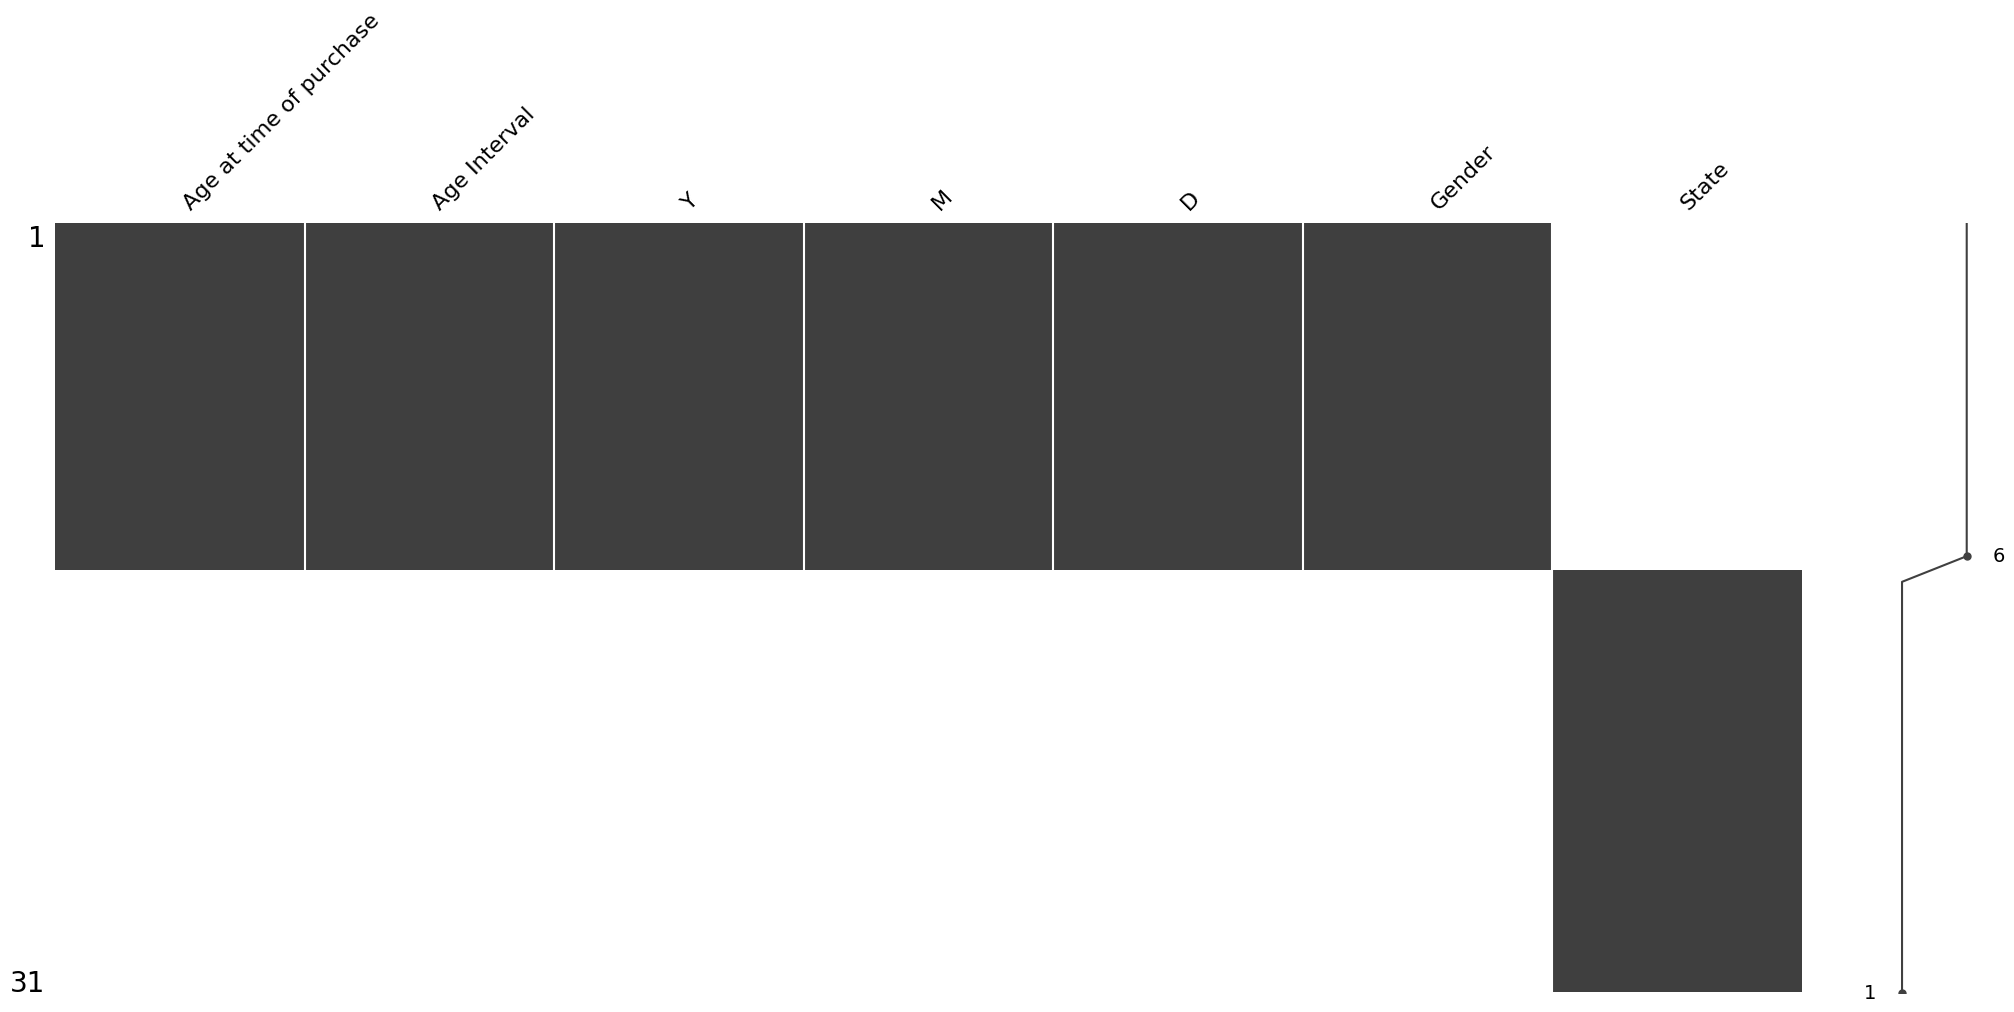

<Figure size 1500x900 with 0 Axes>

In [3]:
import missingno as msno

# Колонки, в которых есть хотя бы одно отсутствующие значение
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns_df = df[missing_columns]

# Выявим записи с missing_columns, для которых хотя бы один признак не содержит значение
missed_values_df = missing_columns_df[missing_columns][df.isnull().sum(axis=1) > 0]

msno.matrix(missed_values_df);
plt.figure(figsize = (15,9));
plt.show();

In [4]:
print(f"""\rВ {missed_values_df.shape[0]} записи отсутствует хотя бы один признак
       \rМатрица пропущенных значений указывает на две группы отсутствий признаков, которые взимно исключают друг друга.
       \rПоэтому эти группы обрабатываются отдельно.
       \rГруппа 1 - State
       \rГруппа 2 - Age at time of purchase, Age Interval, Y, M, D, Gender
       """)

В 31 записи отсутствует хотя бы один признак
Матрица пропущенных значений указывает на две группы отсутствий признаков, которые взимно исключают друг друга.
Поэтому эти группы обрабатываются отдельно.
Группа 1 - State
Группа 2 - Age at time of purchase, Age Interval, Y, M, D, Gender
       


State - категориальный признак. Отсутствие значения можем закодировать значением 'Missing State'.

In [5]:
df['State'].fillna('Missing State', inplace=True)

Gender - категориальный признак. Логически не связан с остальными признаками из группы 2. 

Отсутствие значения можем закодировать значением 'Unknown'.

In [6]:
df['Gender'].fillna('Unknown', inplace=True)

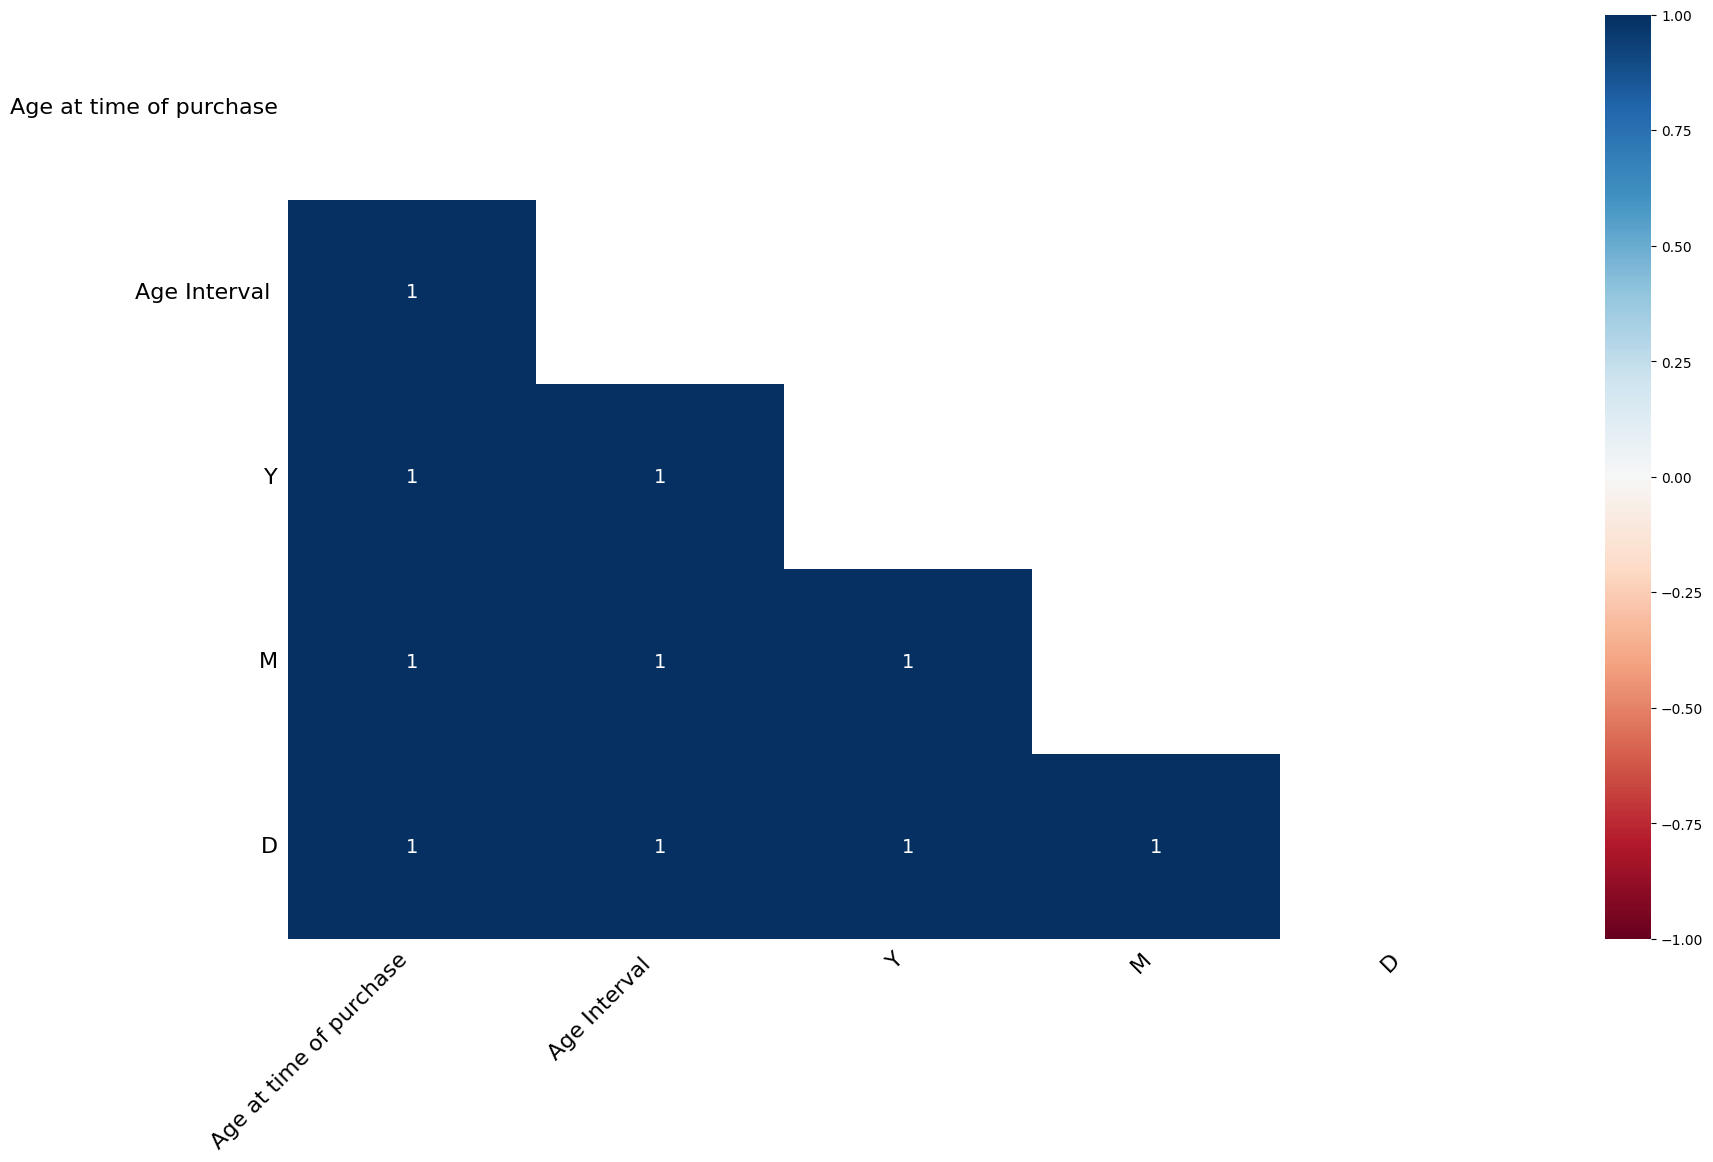

In [7]:
last_missed_values_df = missed_values_df.drop(['State', 'Gender'], axis=1)
msno.heatmap(last_missed_values_df, labels = True);

Признаки 'Age at time of purchase', 'Age Interval', 'Y', 'M', 'D' связаны между собой, их можно считать дублирующими признаками. 

Оставим только признак 'Age at time of purchase'.

In [8]:
df.drop(['Age Interval ', 'Y', 'M', 'D'], axis = 1, inplace = True)

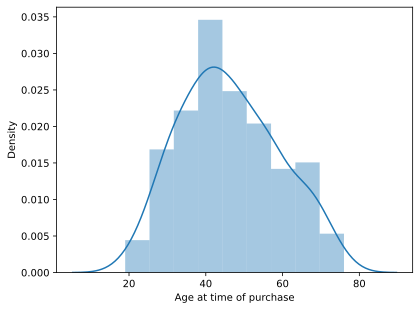

In [9]:
import seaborn as sns

%config InlineBackend.figure_format = 'svg' 
sns.distplot(df['Age at time of purchase']);
plt.show()

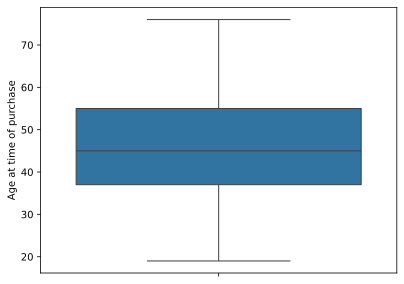

In [10]:
sns.boxplot(df['Age at time of purchase']);

Непустые значения 'Age at time of purchase' распределены близко к нормальному, поэтому заполним пустые значения средним значением.

In [11]:
age_purchase_mean = df['Age at time of purchase'].mean()
df['Age at time of purchase'].fillna(age_purchase_mean, inplace=True)

In [12]:
df['Price'] = (
    df['Price']
    .str.replace('$', '', regex=False)  # удаляем знак доллара
    .str.replace(',', '')               # удаляем запятые
    .str.strip()                        # убираем лишние пробелы
    .astype(float)                      # преобразуем в float
)

In [13]:
df['Country'] = (
    df['Country']
    .str.strip()                        # убираем лишние пробелы
)

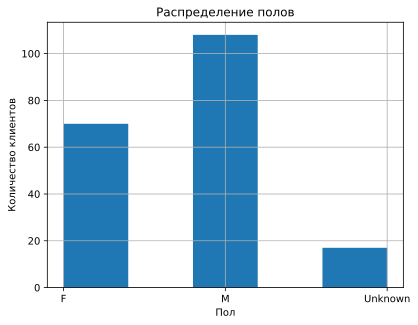

In [14]:
ax = df.Gender.hist(bins = 5)
ax.set_title('Распределение полов')
ax.set_xlabel('Пол')
ax.set_ylabel('Количество клиентов')
plt.show()

В качестве клиента к компании обращаются преимущественно лица мужского пола

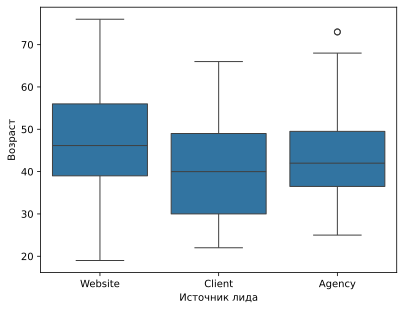

In [15]:
genders = df.Gender.value_counts().sort_values(ascending = False).index.values
sns.boxplot(x="Source", y="Age at time of purchase", 
            data=df[df.Gender.isin(genders)])
plt.xlabel('Источник лида')
plt.ylabel('Возраст')   
plt.show()

Пользователи в широком диапазоне возрастов в качестве источника лида используют Website. Client и Agency используют более молодые клиенты.

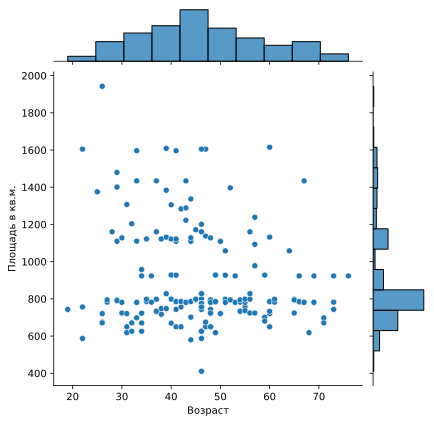

In [16]:
sns.jointplot(x='Age at time of purchase', y='Area (ft.)', 
              data=df, kind='scatter')
plt.xlabel('Возраст') 
plt.ylabel('Площадь в кв.м.') 
plt.show()

In [17]:
print(f"Cредняя площадь приобретаемой собственности - {df['Area (ft.)'].mean():,.1f} кв.м. \n\
В разрезе возрастов нет выделяющейся доминанты, средний возраст - {df['Age at time of purchase'].mean():,.0f} лет.")

Cредняя площадь приобретаемой собственности - 899.9 кв.м. 
В разрезе возрастов нет выделяющейся доминанты, средний возраст - 46 лет.


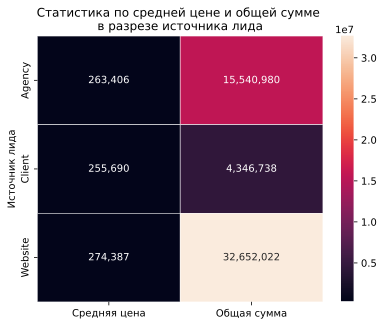

In [18]:
price_per_source_aggs = df[['Source', 'Price']].groupby(['Source']).agg(['mean', 'sum'])
price_per_source_aggs = price_per_source_aggs.set_axis(['Средняя цена', 'Общая сумма'], axis=1)

sns.heatmap(price_per_source_aggs, 
            annot=True, 
            fmt=",.0f", 
            linewidths=.5)
plt.ylabel('Источник лида') 
plt.title('Статистика по средней цене и общей сумме \nв разрезе источника лида')
plt.show()

In [19]:
print(f"Средняя цена покупки сопоставима по разным источникам лида. \n\
При этом есть существенные отличия по общей сумме - Website вносит наибольший вклад по общей сумме \
${price_per_source_aggs.loc['Website']['Общая сумма']:,.0f}")

Средняя цена покупки сопоставима по разным источникам лида. 
При этом есть существенные отличия по общей сумме - Website вносит наибольший вклад по общей сумме $32,652,022


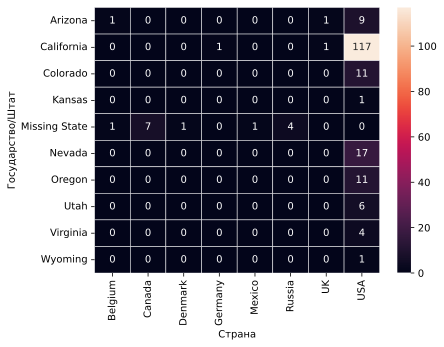

In [20]:
state_country_occurrences = df.pivot_table(
                        index='State', 
                        columns='Country', 
                        aggfunc='size').fillna(0).applymap(int)
sns.heatmap(state_country_occurrences, annot=True, fmt=".0f", 
            linewidths=.5)
plt.xlabel('Страна')
plt.ylabel('Государство/Штат') 
plt.show()

К компании обращаются клиенты преимущественно из штата California (USA). 

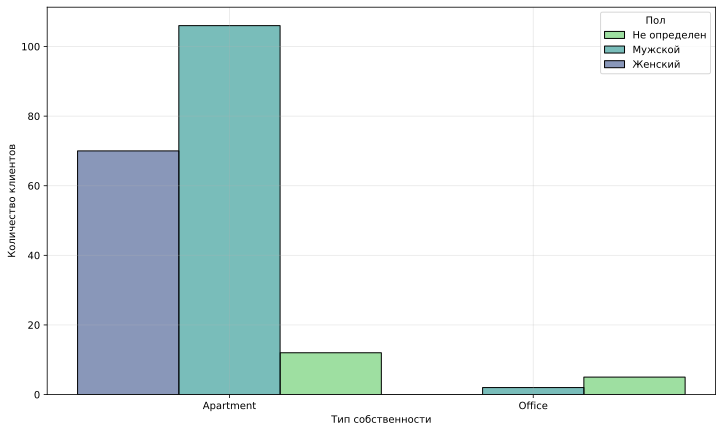

In [21]:
plt.figure(figsize=(12, 7))

sns.histplot(data=df, 
             x='Type of property', 
             hue='Gender',  
             kde=False,  
             multiple='dodge', 
             alpha=0.6,
             palette='viridis',
             bins=30,)

plt.xlabel('Тип собственности')
plt.ylabel('Количество клиентов')
plt.grid(True, alpha=0.3)
plt.legend(
    title='Пол', 
    labels=['Не определен', 'Мужской', 'Женский']
)
plt.show()

Клиентами компании особо пользуются спросом апартаменты. Примечательно, что офисы не востребованы женщинами.

In [22]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

purpose_prop_type_occurrences = df.groupby(['Purpose', 'Type of property']).size().rename('count').reset_index()
purpose_prop_type_occurrences['size'] = 50 + purpose_prop_type_occurrences['count'] * 20

trace0 = go.Scatter(
    x=purpose_prop_type_occurrences['Purpose'],
    y=purpose_prop_type_occurrences['Type of property'],
    mode='markers+text',  
    text=purpose_prop_type_occurrences['count'],
    marker = dict(
        size = 1/10*purpose_prop_type_occurrences['size'],
        color = ['aqua', 'azure', 'lightgreen', 'plum']
    )
)

data = [trace0]
layout = {
    'title': 'Количество покупок в разрезе цели покупки и типа собственности',
    'xaxis_title': 'Цель покупки',
    'yaxis_title': 'Тип Собственности'
}

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Апартаменты приобретаются в основном в качестве дома, в меньшей степени - как инвестиция. 

Офисы приобретаются в основном в качестве инвестиции, в меньшей степени - как дом. 